In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def gen_Gaussian_pyramid(image, number_of_levels=6):
  output_image = image.copy()
  gauss_pyramid = [output_image]

  for i in range(number_of_levels):
    output_image = cv2.pyrDown(output_image)
    gauss_pyramid.append(output_image)

  return gauss_pyramid


def gen_Laplacian_pyramid(gauss_pyramid):
  laplacian_pyramid = [gauss_pyramid[5]]

  for i in range(5, 0, -1):
    GE = cv2.pyrUp(gauss_pyramid[i])

    dim = GE.shape[:2]
    gauss_pyramid[i-1] = cv2.resize(gauss_pyramid[i-1], dim)
    L = cv2.subtract(gauss_pyramid[i-1], GE)
    laplacian_pyramid.append(L)

  return laplacian_pyramid


def adding_pyramids(laplacian_pyramid1, laplacian_pyramid2):
  LS = []
  
  for lp1, lp2 in zip(laplacian_pyramid1, laplacian_pyramid2):
    rows, cols, dbt = lp1.shape
    ls = np.hstack((lp1[:, 0:int(cols/2)], lp2[:, int(cols/2):]))
    LS.append(ls)

  return LS

def reconstruct(LS, number_of_levels=6):
  ls_ = LS[0]
  for i in range(1, number_of_levels):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

  return ls_

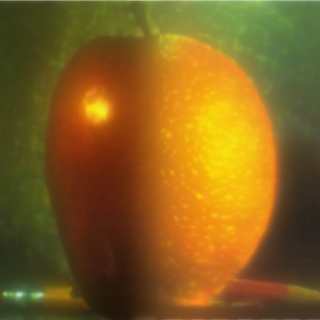

In [84]:
# 1
apple = cv2.imread('apple.png')
apple = cv2.resize(apple, (300, 300))

gauss_pyramid_1 = gen_Gaussian_pyramid(apple)
laplacian_pyramid_1 = gen_Laplacian_pyramid(gauss_pyramid_1)

# 2
orange = cv2.imread('orange.png')
orange = cv2.resize(orange, (300, 300))

gauss_pyramid_2 = gen_Gaussian_pyramid(orange)
laplacian_pyramid_2 = gen_Laplacian_pyramid(gauss_pyramid_2)

# adding pyramids 
LS = adding_pyramids(laplacian_pyramid_1, laplacian_pyramid_2)

# reconstructing
ls_ = reconstruct(LS)

from google.colab.patches import cv2_imshow

cv2_imshow(ls_)